<a href="https://colab.research.google.com/github/ShreePurvaja/Data-Science-Notes/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 26.03.2025

Data Extraction = analyze, organise and  clean

In [2]:
import pandas as pd
dia=pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv")
display(dia)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


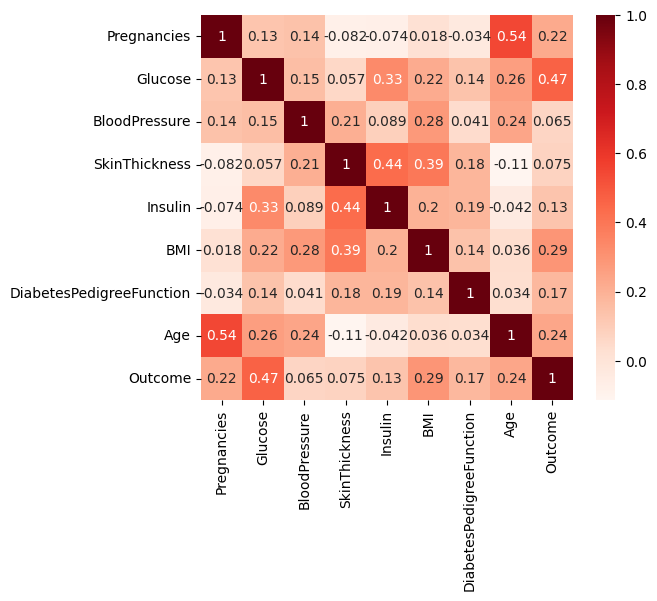

In [14]:
# prompt: correlation heatmap for dia

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
cor = dia.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


Preprocessing(feature selection) - to select the feature and target

Data splitting

training data - x_train, y_train

In [3]:
#glucode;BP,skin thickness - features
#bmi - target
x = dia[['Glucose','BloodPressure','SkinThickness']]
y = dia['BMI']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) #can ignore randome state while there is large no of dataset
#test_size = 20% data for testing and 80% data for training and randomstate = shuffles randomly b/w data but uniformly
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print(model.coef_) #m value
print(model.intercept_) #c value
print(model.predict([[148,72,35]]))


[0.04199383 0.06661283 0.17796625]
18.65393322225497
[35.89396279]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model Evaluation - use testing data for accuracy

model.predict = input x_test and y_test(automatically predicted)

In [8]:
model.predict(x_test)
print(model.score(x_test,y_test))
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(x_test))
print(r2_score(y_test,model.predict(x_test)))
print("\n")
print(x_test,model.predict(x_test))

0.2660449245050891
0.2660449245050891


     Glucose  BloodPressure  SkinThickness
668       98             58             33
324      112             75             32
624      108             64              0
690      107             80              0
473      136             90              0
..       ...            ...            ...
355      165             88              0
534       77             56             30
344       95             72              0
296      146             70             38
462       74             70             40

[154 rows x 3 columns] [32.50575908 34.04812461 27.45248825 28.47629972 30.36024915 33.47034163
 28.03630361 23.56721153 35.07812831 30.02282732 32.78323539 38.01600171
 33.67087885 30.81808302 30.84005704 34.35245361 32.67245883 31.77813018
 26.33880442 33.4900261  27.95064124 32.7062124  37.51158055 31.75365093
 34.11676759 37.84916222 32.03311941 29.91826087 35.07279242 30.16819371
 40.48561894 29.98083349 38.51728271 25.66690311 29.359

r2_score = input y_test and predicted y value(we have to predict not automated)

Error metrics - check with order and data...

In [4]:
from sklearn import metrics
import numpy as np
y_pred=model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
#r2 - accuracy of the model


Mean Absolute Error: 5.2034042673969285
Mean Squared Error: 52.17352303953375
Root Mean Squared Error: 7.2231241882951


0.2660449245050891

save the model as a pickle file

In [10]:
# prompt: write a pickle code to save and load the model

import pickle

# Save the model to a file
filename = 'diabetes_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Use the loaded model to make predictions
# Example:
new_data = [[148, 72, 35]]  # Example input features
predictions = loaded_model.predict(new_data)
print("Predictions using loaded model:", predictions)


Predictions using loaded model: [35.89396279]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
# prompt: write a simple gradio app to accept the  features and showthe predicted value
!pip install gradio
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle as pkl
# Load the pre-trained model
model = pkl.load(open('diabetes_model.pkl', 'rb'))
def predict_bmi(glucose, blood_pressure,skin_thickness):
  """Predicts BMI based on input features."""
  prediction = model.predict([[ glucose, blood_pressure,skin_thickness]])
  return prediction[0]
# Create the Gradio interface
iface = gr.Interface(
    fn=predict_bmi,
    inputs=[
        gr.Number(label="Glucose"),
        gr.Number(label="Blood Pressure"),
        gr.Number(label="Skin Thickness"),
    ],
    outputs=gr.Number(label="Predicted BMI"),
    title="Diabetes BMI Predictor",
    description="Enter the features to get the predicted BMI."
)
# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0c445fa225cba40a12.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
